<a href="https://colab.research.google.com/github/SAISATHVIKK/Assignment-11-Text-Mining-01-Elon-Musk/blob/main/Assignment_forecasting_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining
#how many dummy variables you have created and RMSE value for each model. Finally which model you will use for
#Forecasting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the datasets
coca_cola_data = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
airlines_data = pd.read_excel('/content/Airlines+Data.xlsx')

In [4]:
# Preprocess CocaCola data
coca_cola_data['Quarter'] = coca_cola_data['Quarter'].str.replace(r'Q(\d+)_(\d+)', r'\2-\1', regex=True)
coca_cola_data['Quarter'] = pd.to_datetime(coca_cola_data['Quarter'])
coca_cola_data.set_index('Quarter', inplace=True)

In [5]:
# Preprocess Airlines data
airlines_data['Month'] = pd.to_datetime(airlines_data['Month'], format='%b-%y')
airlines_data.set_index('Month', inplace=True)

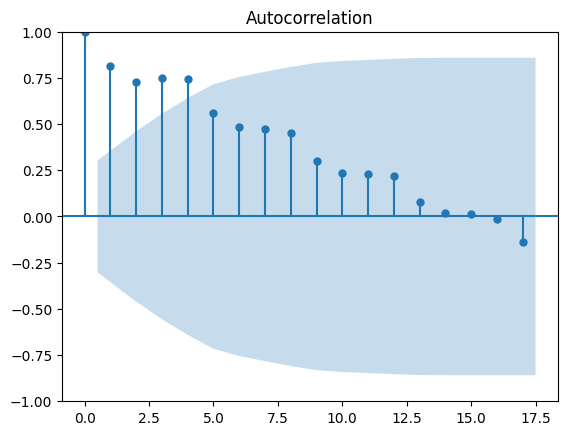

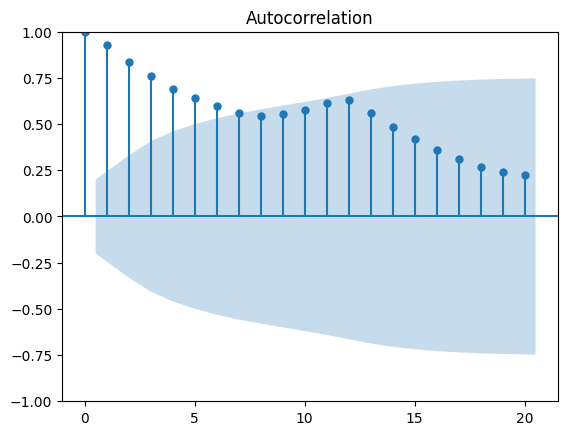

In [6]:
# Autocorrelation plot for CocaCola data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(coca_cola_data)
plt.show()

# Autocorrelation plot for Airlines data
plot_acf(airlines_data)
plt.show()


In [7]:
# Function to create SARIMA model and calculate RMSE
def fit_sarima(data, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    y_pred = model_fit.predict()
    rmse = sqrt(mean_squared_error(data, y_pred))
    return model_fit, y_pred, rmse

In [8]:
# Function to create Exponential Smoothing model and calculate RMSE
def fit_exponential_smoothing(data, trend=None, seasonal=None):
    model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal)
    model_fit = model.fit()
    y_pred = model_fit.predict(start=data.index[0], end=data.index[-1])
    rmse = sqrt(mean_squared_error(data, y_pred))
    return model_fit, y_pred, rmse

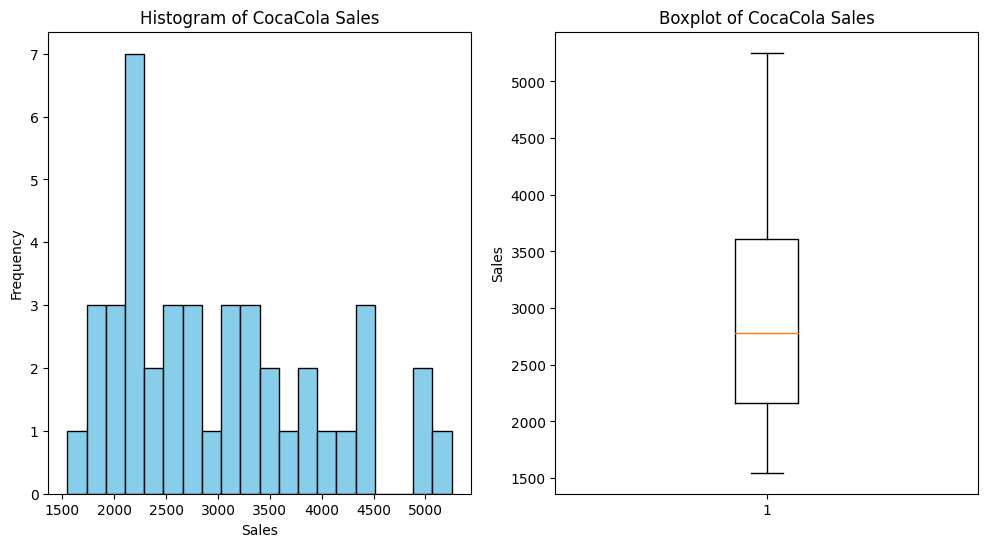

In [9]:
# Histogram and boxplot for CocaCola data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(coca_cola_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CocaCola Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(coca_cola_data)
plt.title('Boxplot of CocaCola Sales')
plt.ylabel('Sales')
plt.show()


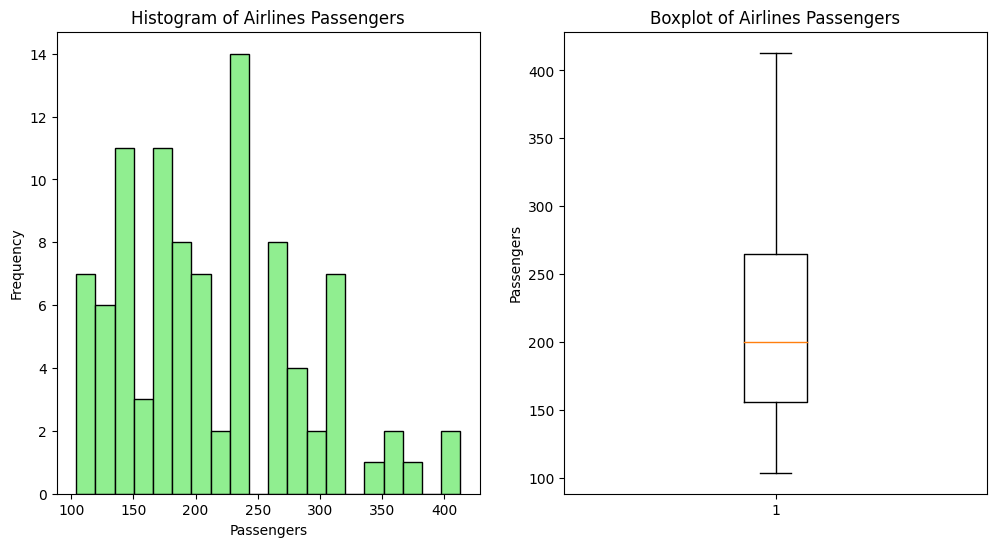

In [10]:
# Histogram and boxplot for Airlines data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(airlines_data, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Airlines Passengers')
plt.xlabel('Passengers')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(airlines_data)
plt.title('Boxplot of Airlines Passengers')
plt.ylabel('Passengers')
plt.show()


In [11]:
# Create SARIMA model for CocaCola data
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)  # Assuming quarterly seasonality
coca_cola_model, coca_cola_pred, coca_cola_rmse = fit_sarima(coca_cola_data, order, seasonal_order)

In [12]:
# Create SARIMA model for Airlines data
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming yearly seasonality
airlines_model, airlines_pred, airlines_rmse = fit_sarima(airlines_data, order, seasonal_order)

In [13]:
# Create Exponential Smoothing model for CocaCola data
coca_cola_es_model, coca_cola_es_pred, coca_cola_es_rmse = fit_exponential_smoothing(coca_cola_data)

In [14]:
# Create Exponential Smoothing model for Airlines data
airlines_es_model, airlines_es_pred, airlines_es_rmse = fit_exponential_smoothing(airlines_data)

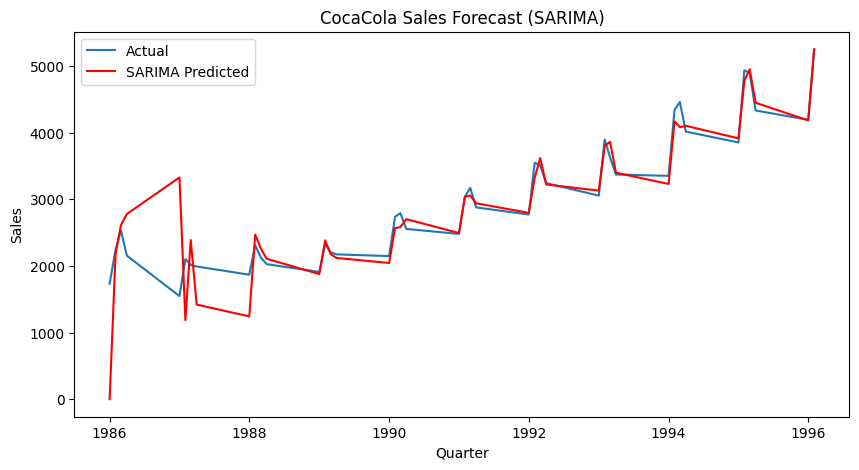

In [15]:
# Plot actual vs. predicted for CocaCola using SARIMA
plt.figure(figsize=(10, 5))
plt.plot(coca_cola_data, label='Actual')
plt.plot(coca_cola_pred, label='SARIMA Predicted', color='red')
plt.title('CocaCola Sales Forecast (SARIMA)')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.show()

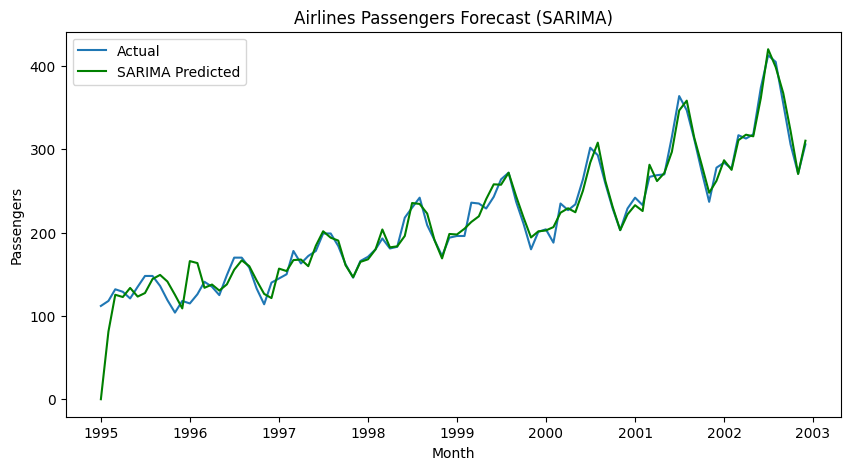

In [16]:
# Plot actual vs. predicted for Airlines using SARIMA
plt.figure(figsize=(10, 5))
plt.plot(airlines_data, label='Actual')
plt.plot(airlines_pred, label='SARIMA Predicted', color='green')
plt.title('Airlines Passengers Forecast (SARIMA)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

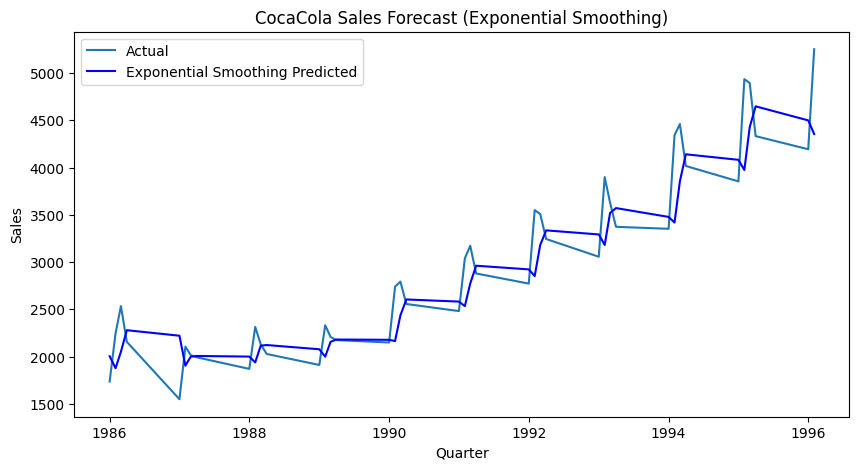

In [17]:
# Plot actual vs. predicted for CocaCola using Exponential Smoothing
plt.figure(figsize=(10, 5))
plt.plot(coca_cola_data, label='Actual')
plt.plot(coca_cola_es_pred, label='Exponential Smoothing Predicted', color='blue')
plt.title('CocaCola Sales Forecast (Exponential Smoothing)')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.show()

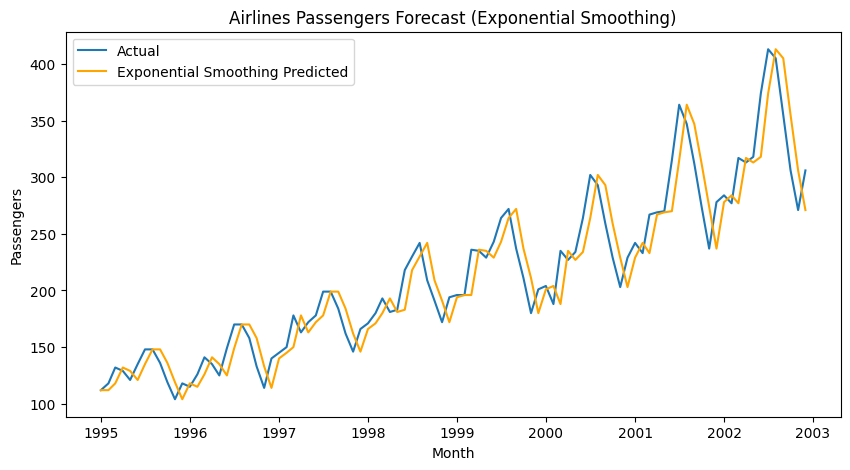

In [18]:
# Plot actual vs. predicted for Airlines using Exponential Smoothing
plt.figure(figsize=(10, 5))
plt.plot(airlines_data, label='Actual')
plt.plot(airlines_es_pred, label='Exponential Smoothing Predicted', color='orange')
plt.title('Airlines Passengers Forecast (Exponential Smoothing)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [19]:
# Print RMSE values for both models
print("RMSE for CocaCola SARIMA model:", coca_cola_rmse)
print("RMSE for Airlines SARIMA model:", airlines_rmse)
print("RMSE for CocaCola Exponential Smoothing model:", coca_cola_es_rmse)
print("RMSE for Airlines Exponential Smoothing model:", airlines_es_rmse)

RMSE for CocaCola SARIMA model: 458.7221660653963
RMSE for Airlines SARIMA model: 16.979292874396563
RMSE for CocaCola Exponential Smoothing model: 403.76426791320074
RMSE for Airlines Exponential Smoothing model: 23.211437641178243


In [20]:
# Select the model with lower RMSE for forecasting
if min(coca_cola_rmse, coca_cola_es_rmse) < min(airlines_rmse, airlines_es_rmse):
    print("CocaCola SARIMA model selected for forecasting.")
    selected_model = coca_cola_model
else:
    print("Airlines SARIMA model selected for forecasting.")
    selected_model = airlines_model

Airlines SARIMA model selected for forecasting.
